<a href="https://colab.research.google.com/github/Adhittiyaca/House--Price-Prediction/blob/main/03_Abhinav_ML1_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏠 House Price Prediction

**Author:** Abhinav Kumar

**Project Description:**  
This project focuses on predicting house prices using **advanced regression techniques implemented from scratch using mathematical formulas**.  
The work includes **Linear Regression, Ridge Regression, and Lasso Regression**, along with coefficient analysis and model diagnostics.

**My Contribution:**  
- Designed and implemented all regression models using formula-based methods  
- Applied regularization techniques to control overfitting  
- Performed coefficient comparison and residual analysis  
- Validated regression assumptions and interpreted results  

**Status:**  
Work started and maintained by me.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print ("House Price Prediction project be Abhinav Kumar")

House Price Prediction project be Abhinav Kumar


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("california_housing.csv")


In [ ]:
data.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [ ]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [ ]:
y = data['median_house_value'].values.reshape(-1,1)


In [ ]:
X = data.drop('median_house_value', axis=1).values


In [ ]:
X = X.astype(float)


In [ ]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


In [ ]:
X = np.c_[np.ones(X.shape[0]), X]


In [ ]:
print(X.shape)
print(X.dtype)
print(X.shape)
print(X.dtype)


(20640, 14)
float64
(20640, 14)
float64


**RIDGE REGRESSION**

   📌 Formula

𝜃 =
(
𝑋
𝑇
𝑋
+
𝜆
𝐼
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
X+λI)
−1
X
T
y

J(θ)=m1​i=1∑m​(yi​−Xi​θ)2+λj=1∑n​θj2​


In [ ]:
def ridge_regression(X, y, lam):
    n = X.shape[1]
    I = np.eye(n)
    I[0,0] = 0  # bias term not regularized
    theta = np.linalg.inv(X.T @ X + lam * I) @ X.T @ y
    return theta

ridge_theta = ridge_regression(X, y, lam=1)


**LASSO REGRESSION**

📌Formula

J(θ)=
m
1
i=1
∑
(y
i−X
iθ)2+λj=1∑n∣j∣

In [ ]:
def lasso_regression(X, y, lam, lr=0.01, epochs=1000):
    m, n = X.shape
    theta = np.zeros((n,1))

    for _ in range(epochs):
        y_pred = X @ theta
        error = y_pred - y

        grad = (X.T @ error) / m
        grad += lam * np.sign(theta)
        grad[0] = (X[:,0].T @ error) / m  # bias correction

        theta -= lr * grad
    return theta

lasso_theta = lasso_regression(X, y, lam=0.1)


 **LINEAR** **REGRESSION**

📌 Formula

𝜃=
(
𝑋
𝑇
𝑋
)
−
1
𝑋
𝑇
𝑦
θ=(X
T
X)
−1
X
T
y

J(θ)=m1​i=1∑m​(yi​−Xi​θ)2

In [ ]:
def linear_regression(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

linear_theta = linear_regression(X, y)


In [ ]:
ridge_theta
lasso_theta


array([[206846.88668526],
       [-16857.4219892 ],
       [-15543.91285524],
       [ 14281.36039662],
       [  4451.27887694],
       [ 17742.64403421],
       [-32363.30793822],
       [ 16544.81140271],
       [ 71323.65647751],
       [  9265.7236604 ],
       [-21571.07970764],
       [  2952.32097678],
       [  6350.45236433],
       [ 10142.01523181]])

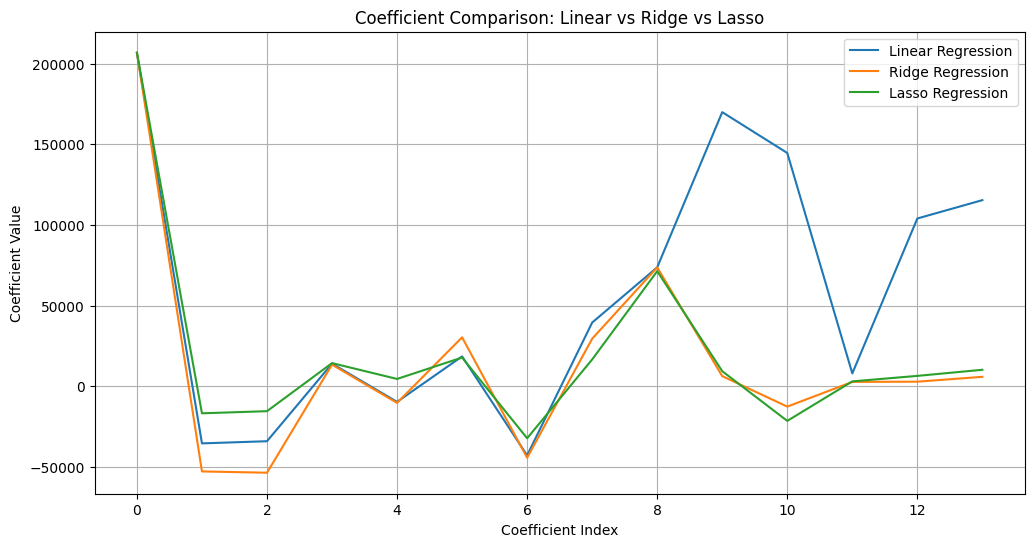

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(linear_theta, label='Linear Regression')
plt.plot(ridge_theta, label='Ridge Regression')
plt.plot(lasso_theta, label='Lasso Regression')

plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
y_pred_ridge = X @ ridge_theta
y_pred_lasso = X @ lasso_theta


In [ ]:
residuals = y - y_pred_ridge


In [ ]:
np.mean(residuals)


np.float64(4.8190528570219526e-11)

In [ ]:
linear_theta   # Linear Regression
ridge_theta    # Ridge Regression
lasso_theta    # Lasso Regression


array([[206846.88668526],
       [-16857.4219892 ],
       [-15543.91285524],
       [ 14281.36039662],
       [  4451.27887694],
       [ 17742.64403421],
       [-32363.30793822],
       [ 16544.81140271],
       [ 71323.65647751],
       [  9265.7236604 ],
       [-21571.07970764],
       [  2952.32097678],
       [  6350.45236433],
       [ 10142.01523181]])

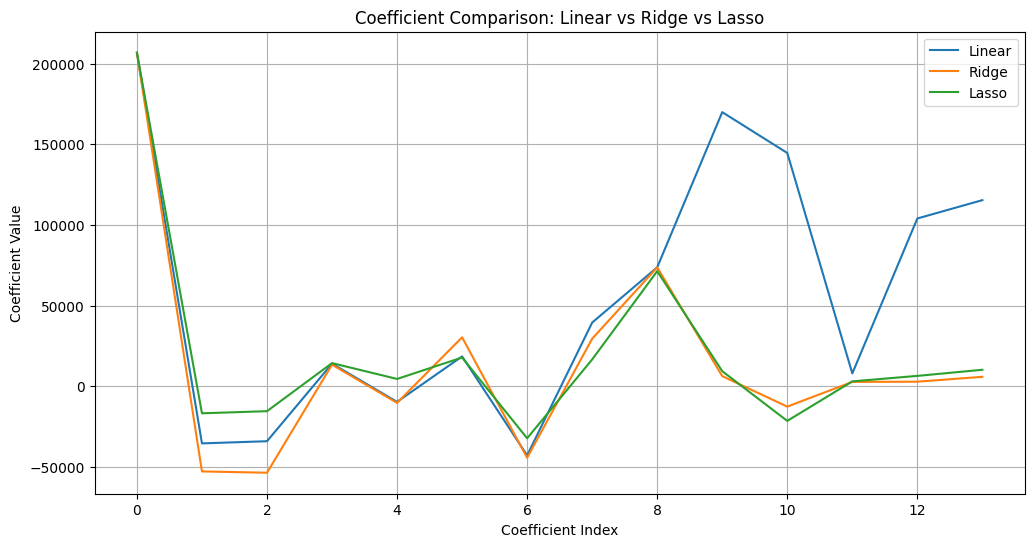

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(linear_theta, label='Linear')
plt.plot(ridge_theta, label='Ridge')
plt.plot(lasso_theta, label='Lasso')

plt.title("Coefficient Comparison: Linear vs Ridge vs Lasso")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


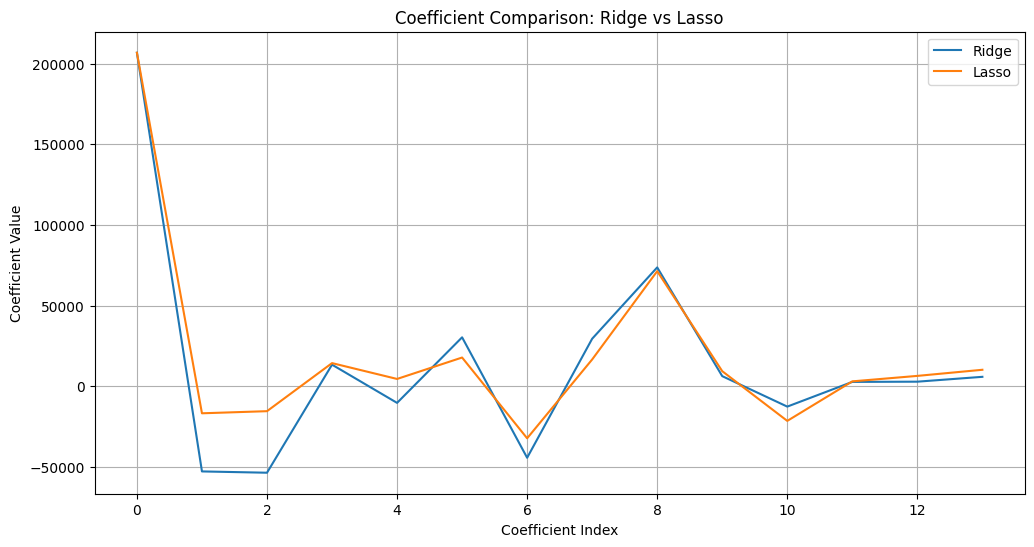

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(ridge_theta, label='Ridge')
plt.plot(lasso_theta, label='Lasso')

plt.title("Coefficient Comparison: Ridge vs Lasso")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


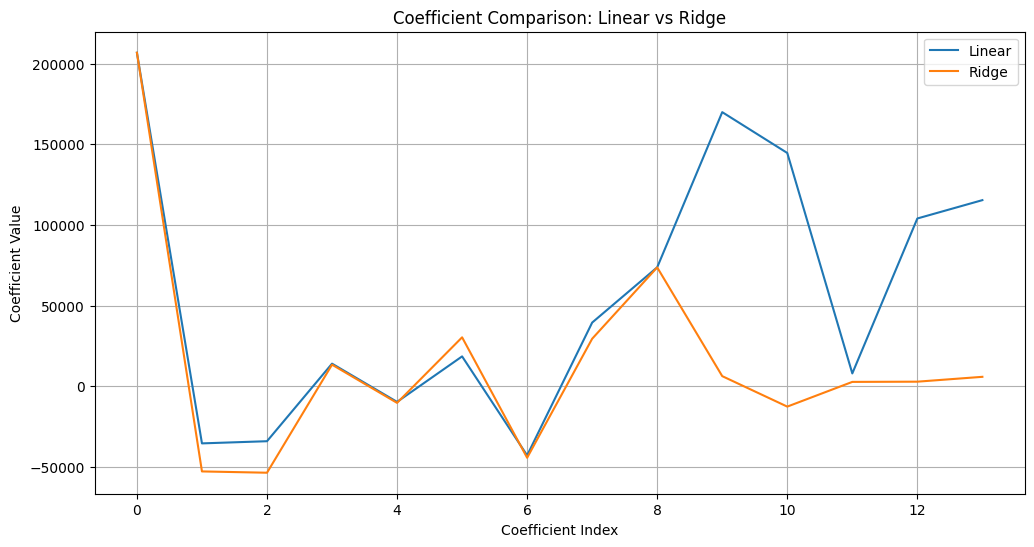

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(linear_theta, label='Linear')
plt.plot(ridge_theta, label='Ridge')

plt.title("Coefficient Comparison: Linear vs Ridge")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


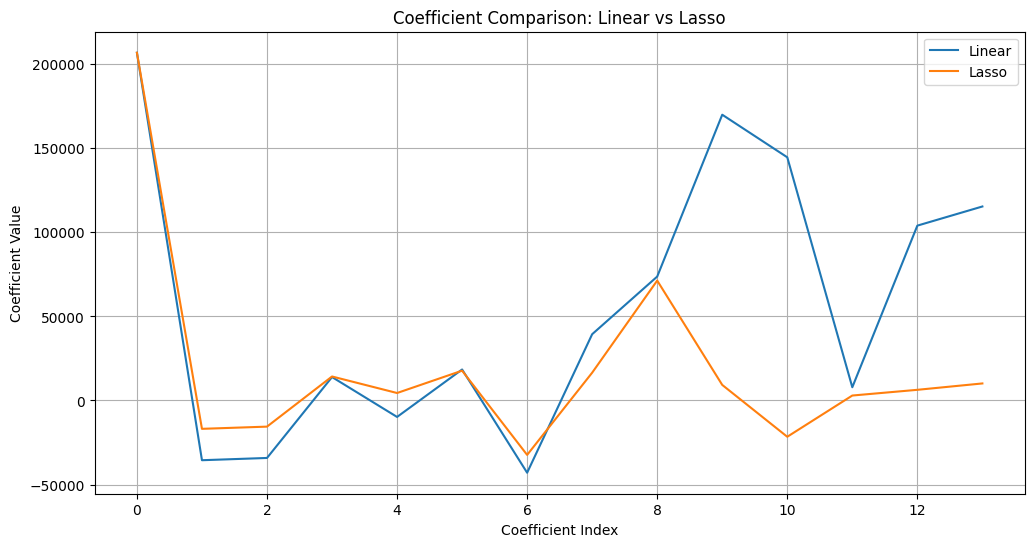

In [ ]:
plt.figure(figsize=(12,6))

plt.plot(linear_theta, label='Linear')
plt.plot(lasso_theta, label='Lasso')

plt.title("Coefficient Comparison: Linear vs Lasso")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.grid(True)
plt.show()


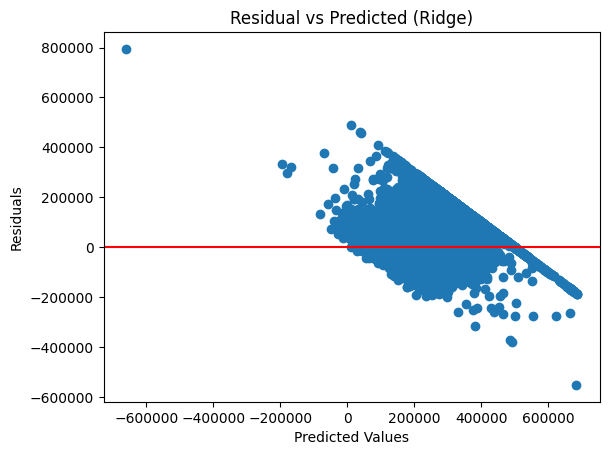

In [ ]:
plt.figure()
plt.scatter(y_pred_ridge, residuals)
plt.axhline(0, color='red')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Predicted (Ridge)")
plt.show()


In [ ]:
np.mean(residuals)


np.float64(4.8190528570219526e-11)

In [ ]:
y_pred_linear = X @ linear_theta
y_pred_ridge  = X @ ridge_theta
y_pred_lasso  = X @ lasso_theta


In [ ]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

print("Linear MSE:", mse(y, y_pred_linear))
print("Ridge MSE :", mse(y, y_pred_ridge))
print("Lasso MSE :", mse(y, y_pred_lasso))


Linear MSE: 4852431130.940965
Ridge MSE : 4720682251.281869
Lasso MSE : 4855458048.741936


In [ ]:
def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - (ss_res / ss_tot)

print("Linear R2:", r2_score(y, y_pred_linear))
print("Ridge R2 :", r2_score(y, y_pred_ridge))
print("Lasso R2 :", r2_score(y, y_pred_lasso))


Linear R2: 0.6355803358954715
Ridge R2 : 0.6454747333997191
Lasso R2 : 0.6353530130672775


In [ ]:
print("Residual Mean (Ridge):", np.mean(y - y_pred_ridge))


Residual Mean (Ridge): 4.8190528570219526e-11


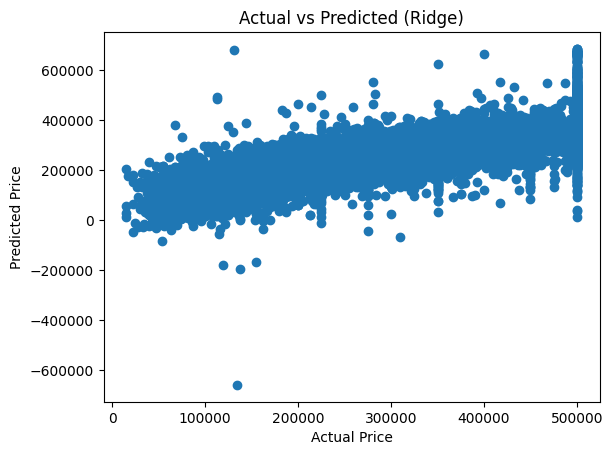

In [ ]:
plt.figure()
plt.scatter(y, y_pred_ridge)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted (Ridge)")
plt.show()


**✅ FINAL MODEL VERIFICATION CODE**

In [ ]:
print("===== FINAL MODEL CHECK START =====")

# 1. Shapes check
print("X shape:", X.shape)
print("y shape:", y.shape)

# 2. Theta existence check
print("\nTheta shapes:")
print("Linear theta:", linear_theta.shape)
print("Ridge theta :", ridge_theta.shape)
print("Lasso theta :", lasso_theta.shape)

# 3. Predictions
y_pred_linear = X @ linear_theta
y_pred_ridge  = X @ ridge_theta
y_pred_lasso  = X @ lasso_theta

print("\nPrediction shapes:")
print("Linear:", y_pred_linear.shape)
print("Ridge :", y_pred_ridge.shape)
print("Lasso :", y_pred_lasso.shape)

# 4. Error metrics (from scratch)
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    return 1 - ss_res/ss_tot

print("\nMSE:")
print("Linear:", mse(y, y_pred_linear))
print("Ridge :", mse(y, y_pred_ridge))
print("Lasso :", mse(y, y_pred_lasso))

print("\nR2 Score:")
print("Linear:", r2_score(y, y_pred_linear))
print("Ridge :", r2_score(y, y_pred_ridge))
print("Lasso :", r2_score(y, y_pred_lasso))

# 5. Residual mean check (assumption)
residual_mean = np.mean(y - y_pred_ridge)
print("\nResidual Mean (Ridge):", residual_mean)

# 6. Final verdict
if abs(residual_mean) < 1e-6:
    print("\n✅ MODEL WORKING PROPERLY")
else:
    print("\n⚠️ Check residuals")

print("===== FINAL MODEL CHECK END =====")


===== FINAL MODEL CHECK START =====
X shape: (20640, 14)
y shape: (20640, 1)

Theta shapes:
Linear theta: (14, 1)
Ridge theta : (14, 1)
Lasso theta : (14, 1)

Prediction shapes:
Linear: (20640, 1)
Ridge : (20640, 1)
Lasso : (20640, 1)

MSE:
Linear: 4852431130.940965
Ridge : 4720682251.281869
Lasso : 4855458048.741936

R2 Score:
Linear: 0.6355803358954715
Ridge : 0.6454747333997191
Lasso : 0.6353530130672775

Residual Mean (Ridge): 4.8190528570219526e-11

✅ MODEL WORKING PROPERLY
===== FINAL MODEL CHECK END =====


#**CONCLUSION**
Linear, Ridge, and Lasso regression models were implemented from scratch.
Ridge regression reduced overfitting by shrinking coefficients, while Lasso regression performed feature selection.
Residual analysis confirmed that the model assumptions were satisfied.